IMPORTING LIBRARIES

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


READING THE DATASET

In [20]:
data=pd.read_csv('creditcard.csv')

In [21]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


EXPLORATORY DATA ANALYSIS

In [22]:
data.isnull().values.any()

False

In [23]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [24]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierfrac=len(fraud)/float(len(valid))
print(outlierfrac)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [25]:
print(fraud.describe())


                Time          V1          V2  ...         V28       Amount  Class
count     492.000000  492.000000  492.000000  ...  492.000000   492.000000  492.0
mean    80746.806911   -4.771948    3.623778  ...    0.075667   122.211321    1.0
std     47835.365138    6.783687    4.291216  ...    0.547291   256.683288    0.0
min       406.000000  -30.552380   -8.402154  ...   -1.869290     0.000000    1.0
25%     41241.500000   -6.036063    1.188226  ...   -0.108868     1.000000    1.0
50%     75568.500000   -2.342497    2.717869  ...    0.146344     9.250000    1.0
75%    128483.000000   -0.419200    4.971257  ...    0.381152   105.890000    1.0
max    170348.000000    2.132386   22.057729  ...    1.779364  2125.870000    1.0

[8 rows x 31 columns]


In [26]:
print(valid.describe())

                Time             V1  ...         Amount     Class
count  284315.000000  284315.000000  ...  284315.000000  284315.0
mean    94838.202258       0.008258  ...      88.291022       0.0
std     47484.015786       1.929814  ...     250.105092       0.0
min         0.000000     -56.407510  ...       0.000000       0.0
25%     54230.000000      -0.917544  ...       5.650000       0.0
50%     84711.000000       0.020023  ...      22.000000       0.0
75%    139333.000000       1.316218  ...      77.050000       0.0
max    172792.000000       2.454930  ...   25691.160000       0.0

[8 rows x 31 columns]


<function matplotlib.pyplot.show>

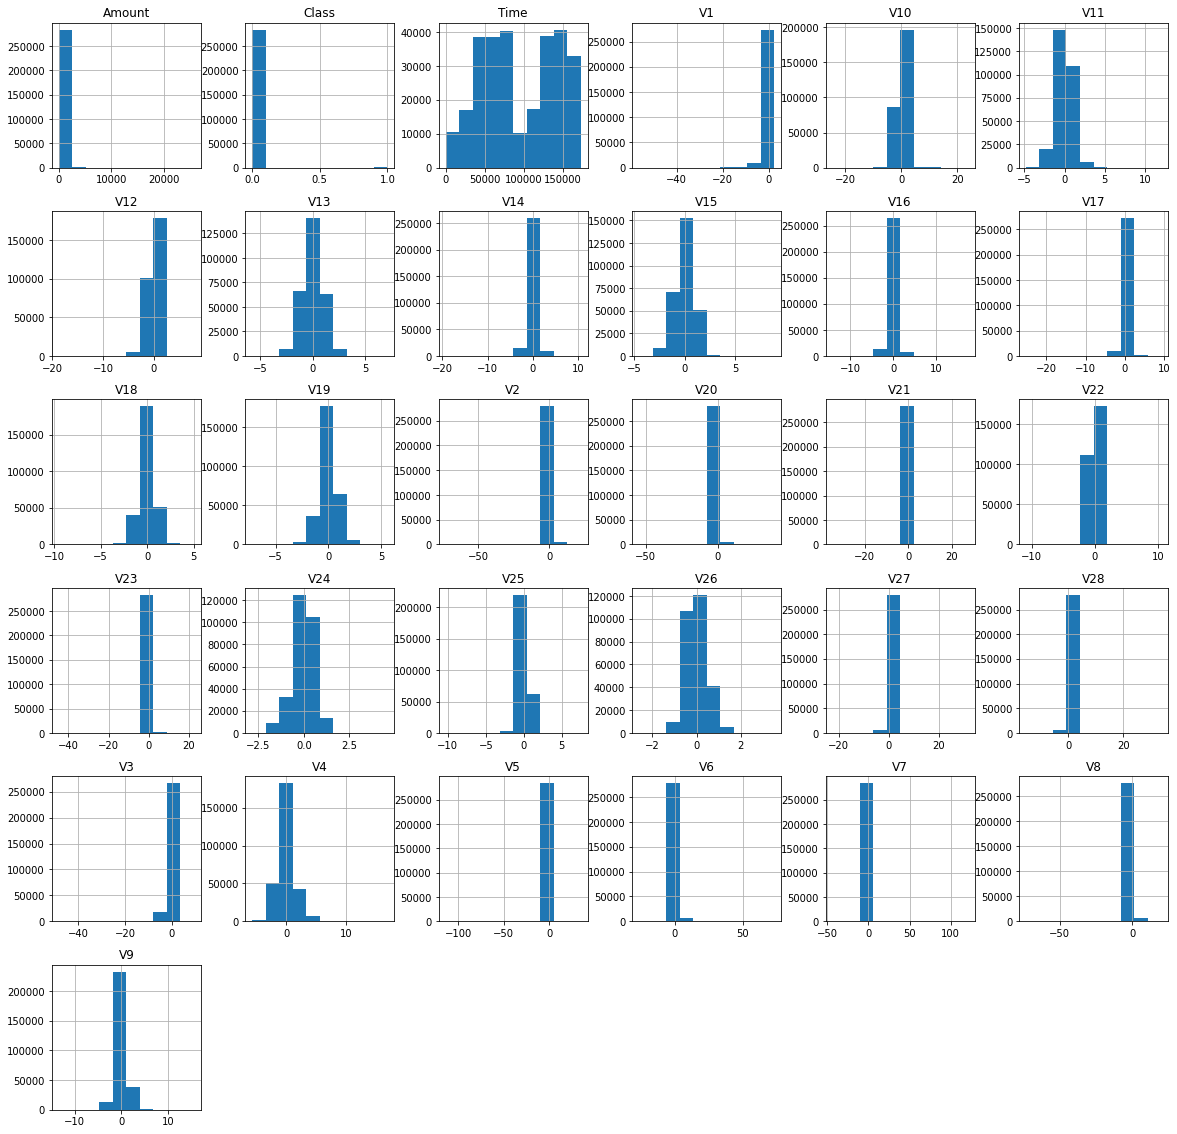

In [27]:
data.hist(figsize=(20,20))
plt.show

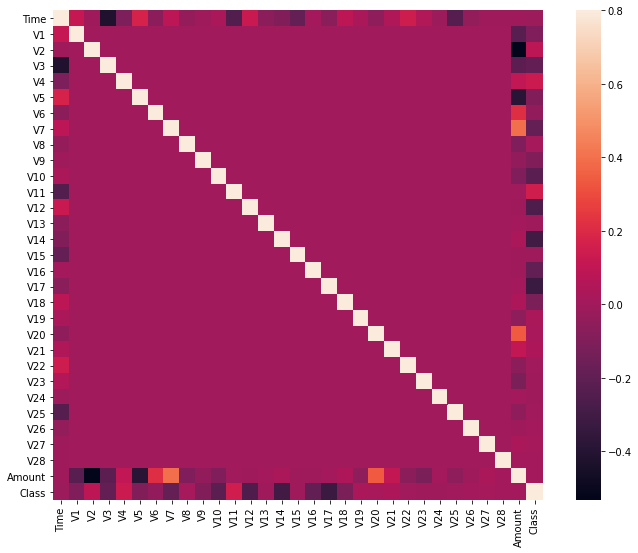

In [28]:
corrmat=data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

FEATURE SCALING

In [29]:
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
data['Amount']=rb.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time']=rb.fit_transform(data['Time'].values.reshape(-1,1))

In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


RANDOM FOREST WITH SMOTE

In [31]:
X=data.drop(['Class'],axis=1) 
y=data["Class"] 
print(X.shape) 
print(y.shape)  
X_val=X.values 
y_val=y.values

(284807, 30)
(284807,)


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_val,y_val,test_size=0.2,random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_x: (454908, 30)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


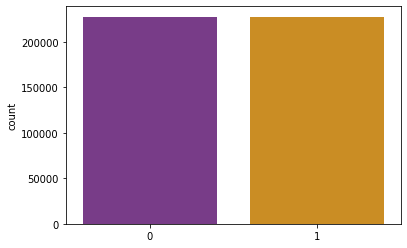

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=data, palette='CMRmap')

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rfc.fit(x_train_s, y_train_s)
y_predict=rfc.predict(x_test)

In [35]:
print(y_predict)

[0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.83      0.86       101

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



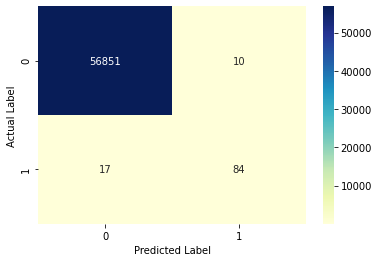

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test,y_predict))
